# From Lung Segmentation ipynb

In [2]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
from cv2 import imread, createCLAHE
import cv2
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import os
# image_path = os.path.join("data/Lung Segmentation/CXR_png")
# mask_path = os.path.join("data/Lung Segmentation/masks/")

In [ ]:
image_path = os.path.join("/content/drive/MyDrive/ColabNotebooks/ImageSegmentation/Lung Segmentation/data/Lung Segmentation/CXR_png/")
mask_path = os.path.join("/content/drive/MyDrive/ColabNotebooks/ImageSegmentation/Lung Segmentation/data/Lung Segmentation/masks/")
aug_img_path = os.path.join("/content/drive/MyDrive/ColabNotebooks/ImageSegmentation/Lung Segmentation/data/Lung Segmentation/aug_img/")
aug_mask_path = os.path.join("/content/drive/MyDrive/ColabNotebooks/ImageSegmentation/Lung Segmentation/data/Lung Segmentation/aug_masks/")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
images = os.listdir(image_path)
mask = os.listdir(mask_path)
mask = [fName.split(".png")[0] for fName in mask]
image_file_name = [fName.split("_mask")[0] for fName in mask]

In [ ]:
check = [i for i in mask if "mask" in i]
print("Total mask that has modified name : ", len(check))

Total mask that has modified name :  566


In [ ]:
aug_images = os.listdir(aug_img_path)
aug_mask = os.listdir(aug_mask_path)

In [ ]:
aug_files = set(os.listdir(aug_img_path)) & set(os.listdir(aug_mask_path))

In [ ]:
len(aug_files)

344

In [ ]:
testing_files = set(os.listdir(image_path)) & set(os.listdir(mask_path))
training_files = check

def getData(X_shape, flag = "test"):
    im_array = []
    mask_array = []
    
    if flag == "test":
        for i in testing_files:
            im = cv2.resize(cv2.imread(os.path.join(image_path, i)), (X_shape, X_shape))[:,:,0]
            mask = cv2.resize(cv2.imread(os.path.join(mask_path,i)),(X_shape,X_shape))[:,:,0]   
            im_array.append(im)
            mask_array.append(mask)
        
        return im_array, mask_array
    
    if flag == "train":
        for i in training_files:
            im = cv2.resize(cv2.imread(os.path.join(image_path,i.split("_mask")[0]+".png")),(X_shape,X_shape))[:,:,0]
            mask = cv2.resize(cv2.imread(os.path.join(mask_path,i+".png")),(X_shape,X_shape))[:,:,0]
            im_array.append(im)
            mask_array.append(mask)
            
        return im_array, mask_array
    
    if flag == "aug":
        for i in aug_files:
            im = cv2.resize(cv2.imread(os.path.join(aug_img_path, i)), (X_shape, X_shape))[:,:,0]
            mask = cv2.resize(cv2.imread(os.path.join(aug_mask_path,i)),(X_shape,X_shape))[:,:,0]
            im_array.append(im)
            mask_array.append(mask)
            
        return im_array, mask_array

In [ ]:
def plotMask(X,y):
    sample = []
    
    for i in range(6):
        left = X[i]
        right = y[i]
        combined = np.hstack((left,right))
        sample.append(combined)
        
    for i in range(0,6,3):
        plt.figure(figsize=(25,10))
        
        plt.subplot(2,3,1+i)
        plt.imshow(sample[i])
        
        plt.subplot(2,3,2+i)
        plt.imshow(sample[i+1])
        
        
        plt.subplot(2,3,3+i)
        plt.imshow(sample[i+2])
        
        plt.show()

In [ ]:
dim = 64*2
X_train,y_train = getData(dim,flag="train")
X_test, y_test = getData(dim)
X_aug, y_aug = getData(dim,flag="aug")

training set


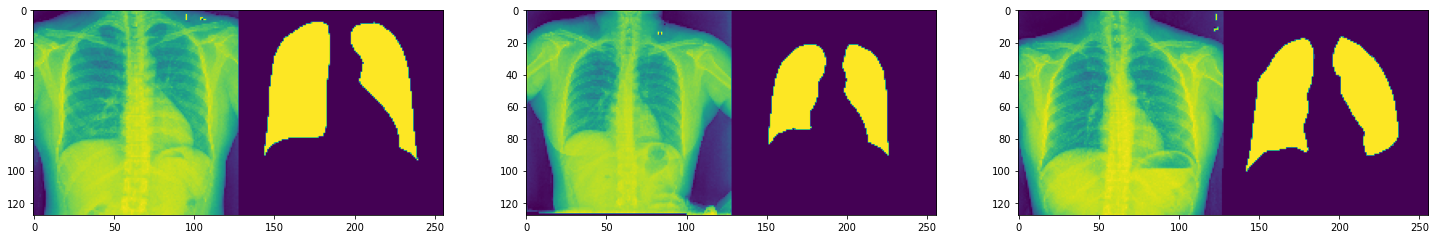

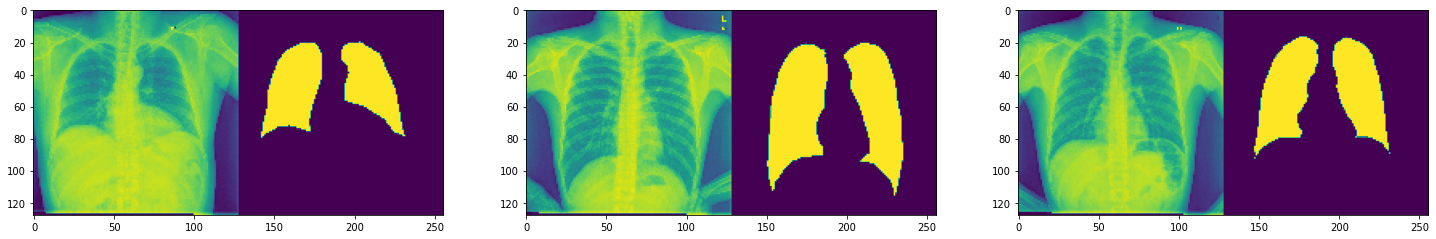

testing set


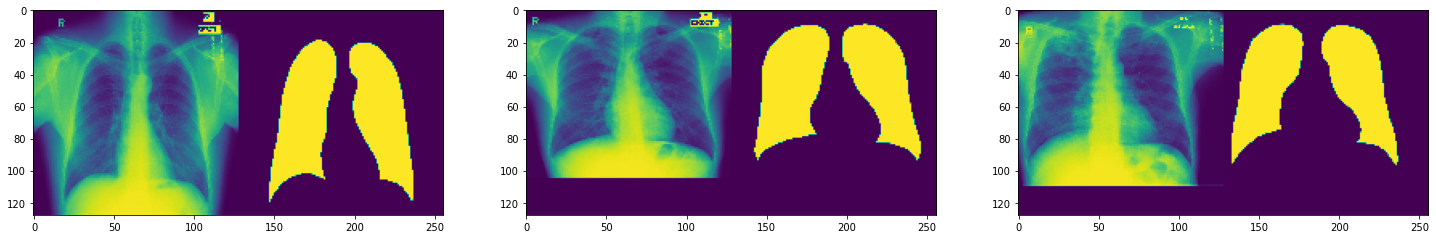

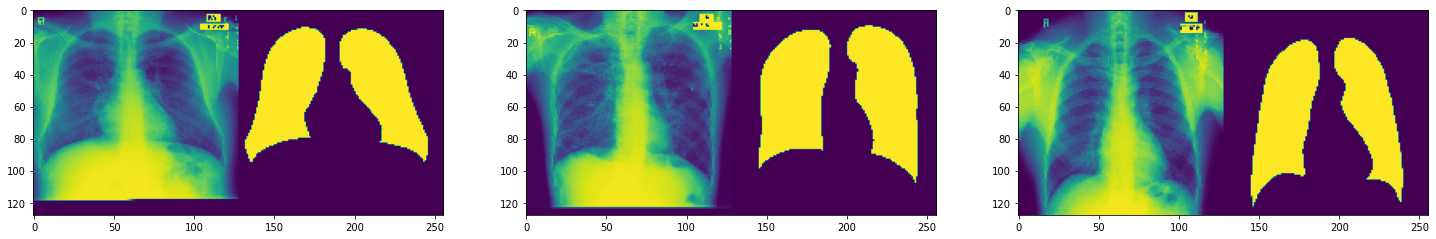

augmentation set


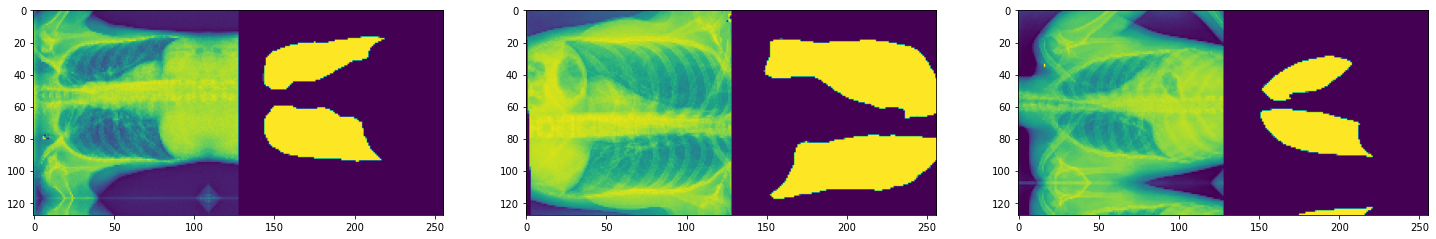

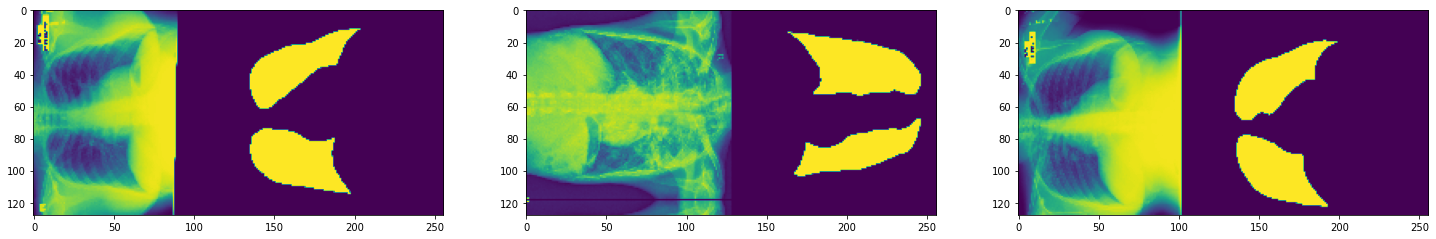

In [ ]:
print("training set")
plotMask(X_train, y_train)
print("testing set")
plotMask(X_test, y_test)
print("augmentation set")
plotMask(X_aug, y_aug)

In [ ]:
X_train = np.array(X_train).reshape(len(X_train), dim, dim, 1)
y_train = np.array(y_train).reshape(len(y_train),dim,dim,1)
X_test = np.array(X_test).reshape(len(X_test),dim,dim,1)
y_test = np.array(y_test).reshape(len(y_test),dim,dim,1)
X_aug = np.array(X_aug).reshape(len(X_aug),dim,dim,1)
y_aug = np.array(y_aug).reshape(len(y_aug),dim,dim,1)
assert X_train.shape == y_train.shape
assert X_test.shape == y_test.shape
assert X_aug.shape == y_aug.shape
images = np.concatenate((X_train,X_test,X_aug),axis=0)
mask  = np.concatenate((y_train,y_test,y_aug),axis=0)

In [ ]:
images.shape

(1048, 128, 128, 1)

In [ ]:
mask.shape

(1048, 128, 128, 1)

In [ ]:
from sklearn.model_selection import train_test_split

train_vol, validation_vol, train_seg, validation_seg = train_test_split((images-127.0)/127.0, 
                                                            (mask>127).astype(np.float32), 
                                                            test_size = 0.1,random_state = 2018)

train_vol, test_vol, train_seg, test_seg = train_test_split(train_vol,train_seg, 
                                                            test_size = 0.1, 
                                                            random_state = 2018)

In [ ]:
train_vol.shape

(848, 128, 128, 1)

In [ ]:
test_vol.shape

(95, 128, 128, 1)

In [ ]:
print(train_vol.dtype)

float64


In [ ]:
train_vol = train_vol.astype(np.float32) 
test_vol = test_vol.astype(np.float32) 

In [ ]:
train_vol.dtype

dtype('float64')

In [ ]:
train_vol=train_vol*255

In [ ]:
train_vol[1,:,:]

In [ ]:
np.max(train_vol[1,:,:])

1.0078740157480315

In [ ]:
np.min(train_vol[1,:,:])

-1.0

In [ ]:
img=np.squeeze(train_vol[1,:,:])

In [ ]:
img.shape

(128, 128)

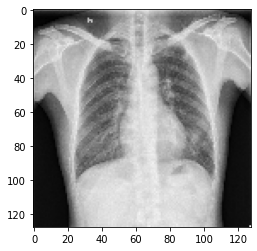

In [ ]:
import matplotlib.pyplot as plt

# Plot the image
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
import numpy as np

def normalize_array(arr):
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    arr_norm = (arr - arr_min) / (arr_max - arr_min)
    return arr_norm

In [ ]:
train_vol=normalize_array(train_vol)

In [ ]:
np.max(train_vol[1,:,:])

1.0

In [ ]:
np.min(train_vol[1,:,:])

0.0

# Start Quantization

In [ ]:
def representative_data_gen():
  for input_value in tf.data.Dataset.from_tensor_slices(train_vol).batch(1).take(100):
    yield [input_value]

In [ ]:
import tensorflow as tf

# Load the HDF5 model
model = tf.keras.models.load_model("normalize_lung_segmentation_10epochs_avg_pooling_700kparam_aug .hdf5",compile=False})

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
# Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Set the input and output tensors to uint8 (APIs added in r2.3)
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_model_quant = converter.convert()

# Save the quantized model to disk
with open("model_quant.tflite", "wb") as f:
    f.write(tflite_model_quant)

In [ ]:
tflite_model_quant_file = "content/integer_model_quant.tflite"
tflite_model_quant_file.write_bytes(tflite_model_quant)

In [ ]:
import tensorflow as tf
import numpy as np

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="new_model_quant.tflite")
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Check if all inputs are quantized
all_inputs_quantized = all(
    np.issubdtype(input_detail['dtype'], np.integer)
    for input_detail in input_details
)

# Check if all outputs are quantized
all_outputs_quantized = all(
    np.issubdtype(output_detail['dtype'], np.integer)
    for output_detail in output_details
)

if all_inputs_quantized and all_outputs_quantized:
    print("The model is fully quantized.")
else:
    print("The model is not fully quantized.")

The model is fully quantized.


In [ ]:
import tensorflow as tf

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='deeplabv3_mnv2_pascal_quant_edgetpu.tflite')

# Get the model identifier from the Interpreter
input_details = interpreter.get_input_details()
model_id = input_details[0]['name']

print(model_id)

MobilenetV2/MobilenetV2/input


In [ ]:
import tensorflow as tf

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='model_quant.tflite')

# Get the model identifier from the Interpreter
input_details = interpreter.get_input_details()
model_id = input_details[0]['name']

print(model_id)

serving_default_input_1:0


In [ ]:
import tensorflow as tf

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='new_model_quant.tflite')

# Get the model identifier from the Interpreter
input_details = interpreter.get_input_details()
model_id = input_details[0]['name']

print(model_id)

serving_default_input_1:0


In [ ]:
!pip install tensorflow --upgrade

      Successfully uninstalled tensorflow-2.9.2


In [ ]:
!pip install tensorflow==2.9.2

In [ ]:
import tensorflow as tf

print(tf.__version__)


2.11.0


In [ ]:
import tensorflow as tf

if hasattr(tf.lite.TFLiteConverter, 'from_lite_interpreter'):
    print("The 'from_lite_interpreter' method is available.")
else:
    print("The 'from_lite_interpreter' method is not available.")

The 'from_lite_interpreter' method is not available.


In [ ]:
import tensorflow as tf

# Load the TFLite model
model = tf.lite.Interpreter(model_path='model_quant.tflite')

# Convert the TFLite model to a TensorFlow model
converter = tf.lite.TFLiteConverter.from_lite_interpreter(model)

# Set the new model identifier
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, 'TFL3']

# Convert the TensorFlow model back to a TFLite model
tflite_model = converter.convert()

# Save the new TFLite model
with open('new_model_quant.tflite', 'wb') as f:
    f.write(tflite_model)

# Convert the model using tflie converter


In [3]:
model = tf.keras.models.load_model('/content/brats_3d_90epochs.hdf5',compile=False)

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('brats.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [ ]:
import tensorflow as tf

In [ ]:
# Load the saved model
model = tf.keras.models.load_model('lung_segmentation_80epochs_avg_pooling_700kparam_aug.hdf5',custom_objects={'dice_coef_loss': dice_coef_loss,
                                      'dice_coef':dice_coef})

# Export the model
tf.saved_model.save(model, '/content/saved_model')

In [ ]:
saved_model_dir='/content/saved_model/'

In [ ]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('saved_model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
# Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Set the input and output tensors to uint8 (APIs added in r2.3)
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_quant_model = converter.convert()

# Save the model.
with open('normalize_optimized_saved_model.tflite', 'wb') as f:
  f.write(tflite_quant_model)

# From Github

In [ ]:
!pip install tensorflow==2.11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random

def representative_dataset():
  for _ in range(100):
    data = np.random.rand(1, 128, 128, 1)
    yield [data.astype(np.float32)]

model = tf.keras.models.load_model("lung_segmentation_80epochs_avg_pooling_700kparam_aug.hdf5",compile=False)

model.input.set_shape((1,) + model.input.shape[1:])
print(model.input.shape)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.target_spec.supported_types = [tf.int8]
converter.inference_input_type = tf.uint8 # or tf.uint8
converter.inference_output_type = tf.uint8 # or tf.uint8

tflite_quant_model = converter.convert()

with open('test_quant.tflite', 'wb') as f:
  f.write(tflite_quant_model)

(1, 128, 128, 1)


/usr/local/lib/python3.8/dist-packages/tensorflow/lite/python/convert.py:765: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random

def representative_dataset():
  for _ in range(100):
    data = np.random.rand(1, 128, 128, 1)
    yield [data.astype(np.float32)]

model = tf.keras.models.load_model("lung_segmentation_80epochs_avg_pooling_700kparam_aug.hdf5",compile=False)

model.input.set_shape((1,) + model.input.shape[1:])
print(model.input.shape)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.target_spec.supported_types = [tf.int8]
converter.inference_input_type = tf.int8 # or tf.uint8
converter.inference_output_type = tf.int8 # or tf.uint8

tflite_quant_model = converter.convert()

with open('test_quant.tflite', 'wb') as f:
  f.write(tflite_quant_model)

(1, 128, 128, 1)


/usr/local/lib/python3.8/dist-packages/tensorflow/lite/python/convert.py:765: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
